In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

df = pd.read_csv("../Data/events.csv", encoding="windows-1252")
df['SubmitDateTime'] = pd.to_datetime(df['SubmitDateTime'], format="%d/%m/%Y %H:%M:%S")

In [2]:
from surprise import NormalPredictor, SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, KFold, PredefinedKFold
import numpy as np

reader = Reader(rating_scale=(0, 3))
# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[df['SubmitDateTime'] < "2015-03-24"][['UserId', 'ExerciseId', 'Correct']], reader)
data_test = df[df['SubmitDateTime'] >= "2015-03-24"][['UserId', 'ExerciseId', 'Correct']]
algo = SVD()

algo.fit(data.build_full_trainset())

predictions = []
actuals = []
for ix, row in data_test.iterrows():
    prediction = algo.predict(uid=row[0], iid=row[1])
    prediction = prediction.est
    
    predictions.append(prediction)
    actuals.append(row[2])
    
predictions = np.array(predictions)
actuals = np.array(actuals)

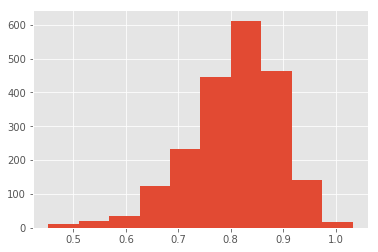

In [3]:
plt.hist(predictions);

In [4]:
binary_predictions = (predictions > 0.65).astype(int)

(binary_predictions == actuals).sum() / len(binary_predictions)

0.7909738717339667